## 1. Problem Statement

Proyek ini bertujuan untuk membangun sistem rekomendasi tanaman berdasarkan parameter tanah dan cuaca,
seperti nitrogen (N), phosphorous (P), potassium (K), suhu, kelembaban, pH, dan curah hujan.
Model ini akan memprediksi jenis tanaman yang paling sesuai ditanam berdasarkan data tersebut. Notebook ini juga telah dilengkapi dengan dokumentasi menggunakan text cell untuk menjelaskan setiap tahapan proyek,
mulai dari pemahaman data hingga evaluasi model, sesuai dengan kriteria submission.

## 2. Import Library 

In [3]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## 3. Memuat Dataset

In [5]:
# Load Data
df=pd.read_csv('Crop_recommendation.csv')

In [6]:
#Membaca data
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 4. Analisis Eksplorasi Data/Data Understanding

Analisis awal dilakukan untuk memahami karakteristik data, mengidentifikasi nilai kosong, dan melihat distribusi variabel.
Termasuk juga visualisasi boxplot untuk mendeteksi outlier pada fitur numerik, pie diagram untuk melihat sebaran data label jenis tanaman, matriks korelasi untuk mengetahui korelasi antar komponen fitur, histogram untuk mengetahui distribusi nilai dari fitur numerik

In [7]:
print(df.shape[0])

2200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
print("\nUnique Crops:", df['label'].nunique())


Unique Crops: 22


In [16]:
print("\nNull Values:")
print(df.isnull().sum())


Null Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [32]:
df.duplicated().sum()

0

<Figure size 1200x600 with 0 Axes>

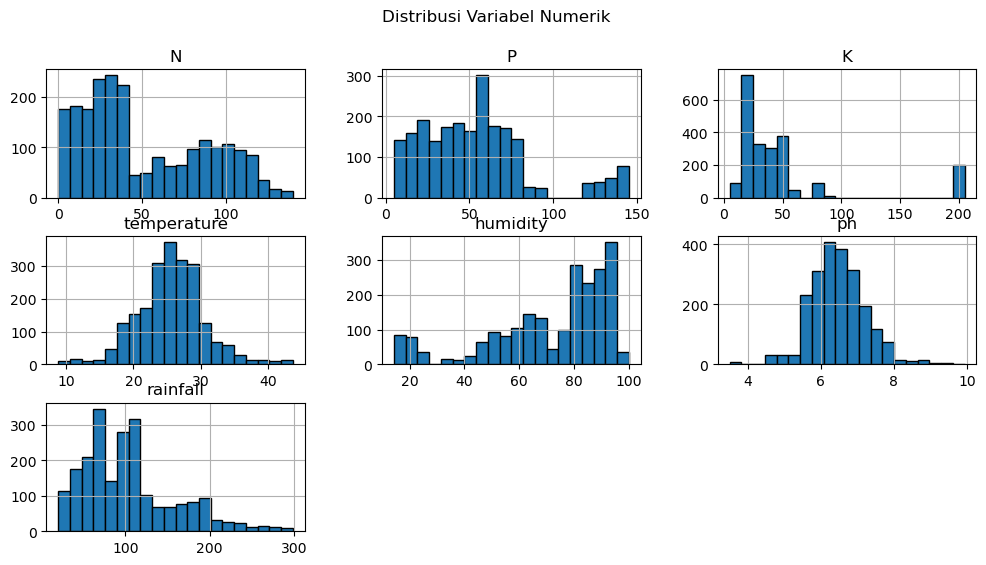

In [17]:
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 6), edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

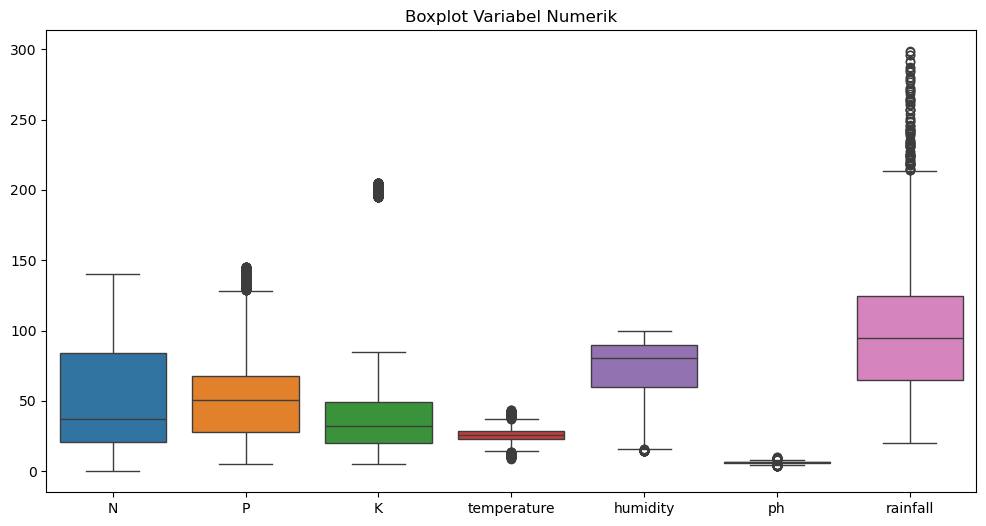

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot Variabel Numerik")
plt.show()

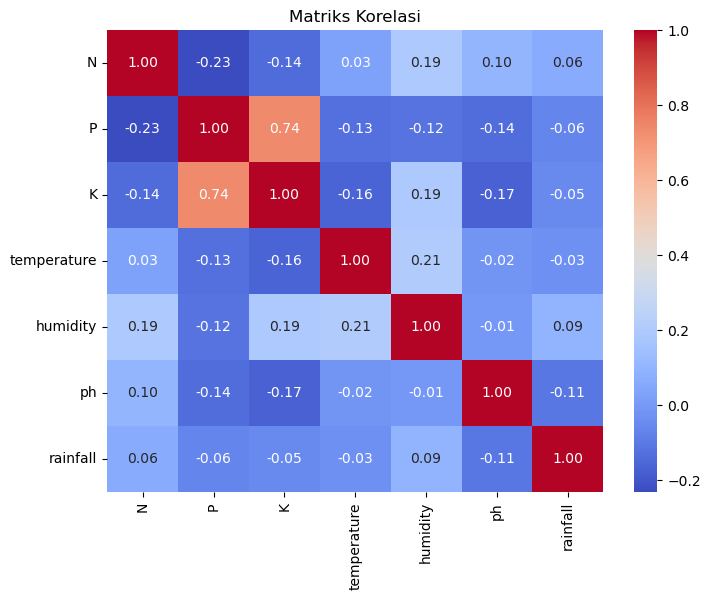

In [20]:
data=df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

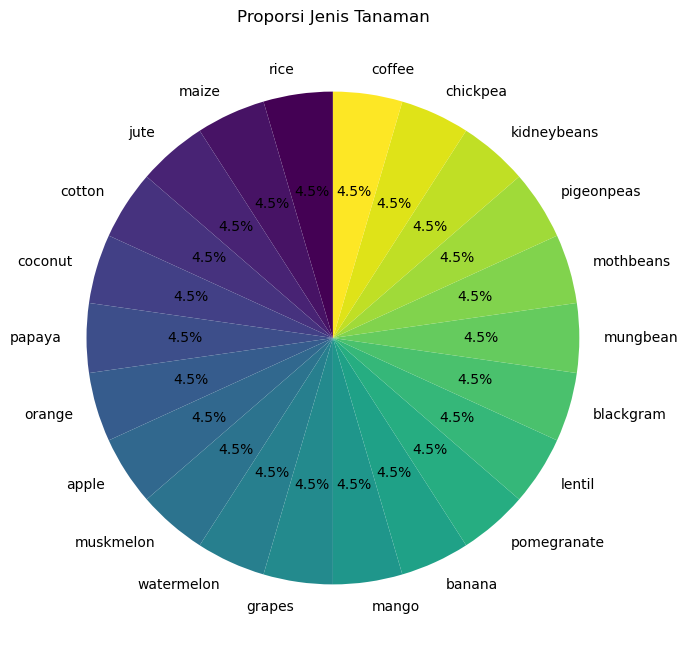

In [21]:
plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', cmap="viridis", startangle=90)
plt.title("Proporsi Jenis Tanaman")
plt.ylabel("")
plt.show()

## 5. Data Preparation

Tahap ini mencakup proses pemisahan data fitur (X) dan label (y), serta encoding label menjadi format numerik agar dapat diproses oleh model machine learning.

In [22]:
X = df.drop('label', axis=1)
y = df['label']

In [23]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Data kemudian dibagi menjadi data latih dan data uji dengan rasio 80:20
untuk memastikan evaluasi model yang adil dan tidak bias.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Modeling

ada tahap ini, berbagai model machine learning diterapkan:
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Support Vector Classifier (SVC)
- Gaussian Naive Bayes

Tujuannya adalah membandingkan performa tiap model pada data yang sama.

In [26]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "GaussianNB": GaussianNB()
}
results=[]

## 7. Evaluasi Model 

Tahap ini mengevaluasi performa masing-masing model menggunakan:
- Akurasi
- Precision, Recall, dan F1-score (macro average)
- Confusion Matrix untuk melihat distribusi prediksi


Decision Tree Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   21.000000
2              0.952381  1.000000  0.975610   20.000000
3              1.000000  1.000000  1.000000   26.000000
4              0.964286  1.000000  0.981818   27.000000
5              1.000000  1.000000  1.000000   17.000000
6              1.000000  1.000000  1.000000   17.000000
7              1.000000  1.000000  1.000000   14.000000
8              0.916667  0.956522  0.936170   23.000000
9              1.000000  1.000000  1.000000   20.000000
10             0.916667  1.000000  0.956522   11.000000
11             1.000000  0.952381  0.975610   21.000000
12             1.000000  1.000000  1.000000   19.000000
13             1.000000  0.916667  0.956522   24.000000
14             1.000000  1.000000  1.000000   19.000000
15             1.000000  1.000000  1.000000   17.000000
16        

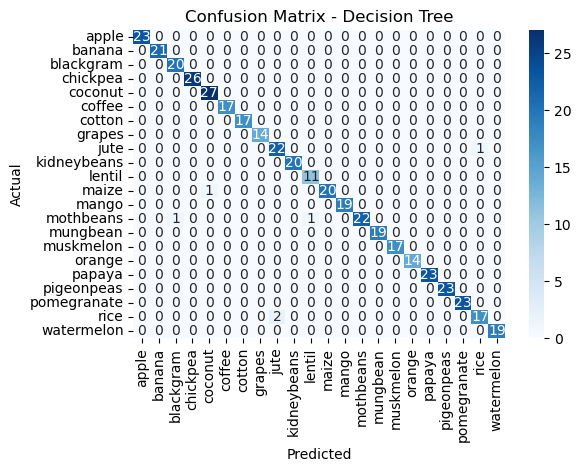


Random Forest Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   21.000000
2              1.000000  1.000000  1.000000   20.000000
3              1.000000  1.000000  1.000000   26.000000
4              1.000000  1.000000  1.000000   27.000000
5              1.000000  1.000000  1.000000   17.000000
6              1.000000  1.000000  1.000000   17.000000
7              1.000000  1.000000  1.000000   14.000000
8              0.920000  1.000000  0.958333   23.000000
9              1.000000  1.000000  1.000000   20.000000
10             0.916667  1.000000  0.956522   11.000000
11             1.000000  1.000000  1.000000   21.000000
12             1.000000  1.000000  1.000000   19.000000
13             1.000000  0.958333  0.978723   24.000000
14             1.000000  1.000000  1.000000   19.000000
15             1.000000  1.000000  1.000000   17.000000
16        

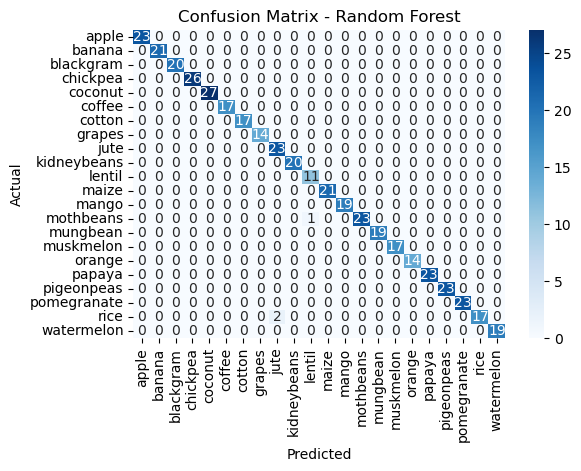


KNN Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   21.000000
2              0.950000  0.950000  0.950000   20.000000
3              1.000000  1.000000  1.000000   26.000000
4              1.000000  1.000000  1.000000   27.000000
5              0.944444  1.000000  0.971429   17.000000
6              0.894737  1.000000  0.944444   17.000000
7              1.000000  1.000000  1.000000   14.000000
8              0.814815  0.956522  0.880000   23.000000
9              0.909091  1.000000  0.952381   20.000000
10             0.687500  1.000000  0.814815   11.000000
11             1.000000  0.904762  0.950000   21.000000
12             0.904762  1.000000  0.950000   19.000000
13             1.000000  0.833333  0.909091   24.000000
14             1.000000  1.000000  1.000000   19.000000
15             1.000000  1.000000  1.000000   17.000000
16             1.000

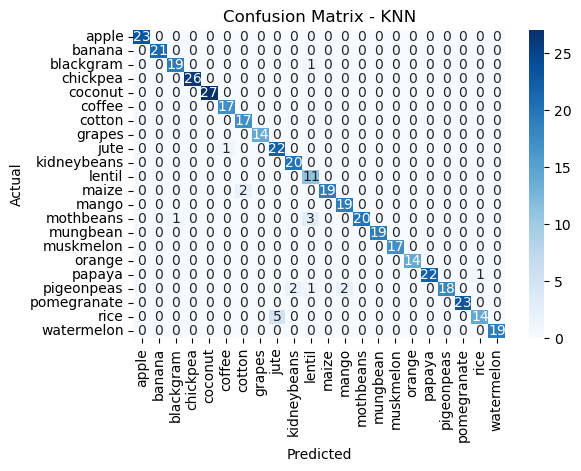


SVC Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   21.000000
2              1.000000  0.950000  0.974359   20.000000
3              1.000000  1.000000  1.000000   26.000000
4              1.000000  1.000000  1.000000   27.000000
5              0.944444  1.000000  0.971429   17.000000
6              0.944444  1.000000  0.971429   17.000000
7              1.000000  1.000000  1.000000   14.000000
8              0.777778  0.913043  0.840000   23.000000
9              0.909091  1.000000  0.952381   20.000000
10             0.785714  1.000000  0.880000   11.000000
11             1.000000  0.952381  0.975610   21.000000
12             1.000000  1.000000  1.000000   19.000000
13             1.000000  0.916667  0.956522   24.000000
14             1.000000  1.000000  1.000000   19.000000
15             1.000000  1.000000  1.000000   17.000000
16             1.000

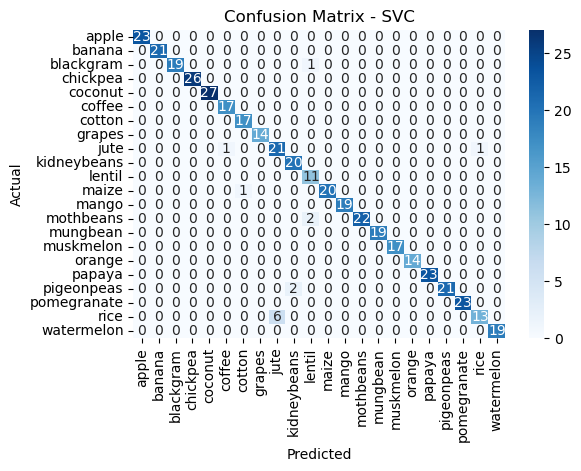


GaussianNB Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   23.000000
1              1.000000  1.000000  1.000000   21.000000
2              1.000000  1.000000  1.000000   20.000000
3              1.000000  1.000000  1.000000   26.000000
4              1.000000  1.000000  1.000000   27.000000
5              1.000000  1.000000  1.000000   17.000000
6              1.000000  1.000000  1.000000   17.000000
7              1.000000  1.000000  1.000000   14.000000
8              0.920000  1.000000  0.958333   23.000000
9              1.000000  1.000000  1.000000   20.000000
10             1.000000  1.000000  1.000000   11.000000
11             1.000000  1.000000  1.000000   21.000000
12             1.000000  1.000000  1.000000   19.000000
13             1.000000  1.000000  1.000000   24.000000
14             1.000000  1.000000  1.000000   19.000000
15             1.000000  1.000000  1.000000   17.000000
16           

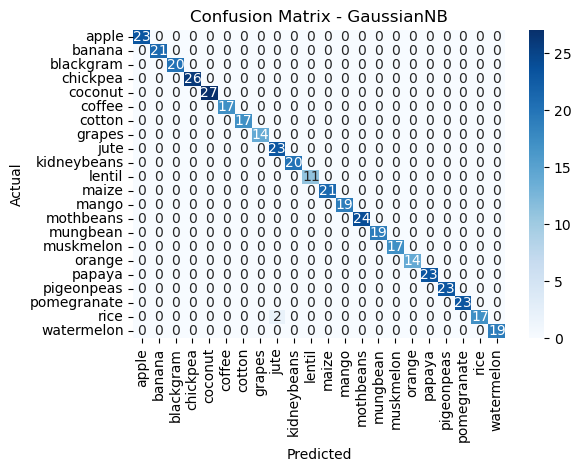

In [29]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results.append([name, accuracy, classification["macro avg"]["precision"], classification["macro avg"]["recall"], classification["macro avg"]["f1-score"]])
    
    print(f"\n{name} Classification Report:")
    print(pd.DataFrame(classification).transpose())
    
    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [30]:
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(comparison_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.986364   0.986111  0.987287  0.986417
1  Decision Tree  0.986364   0.986111  0.987287  0.986417
2  Random Forest  0.993182   0.992576  0.993321  0.992637
3            KNN  0.956818   0.956304  0.960027  0.954614
4            SVC  0.968182   0.967729  0.969516  0.966552
5     GaussianNB  0.995455   0.996364  0.995215  0.995581


## Analisis Performa 

**A. Decision Tree**

    - Akurasi: 98.6%
    - Precision/Recall/F1: ≈ 98.6%–98.7%
    - Kesimpulan : Performanya konsisten tinggi, meskipun sedikit di bawah Random Forest dan GaussianNB.
**B. Random Forest**

    - Akurasi: 99.31% 
    - Precision, Recall, F1-score: ≈ 99.2%–99.3%
    - Kesimpulan: Random Forest adalah model terbaik secara keseluruhan — sangat stabil, presisi tinggi, dan minim  kesalahan prediksi.

**C. K-Nearest Neighbors (KNN)**

    - Akurasi: 95.6%
    - Precision/Recall/F1: ≈ 95.3%–95.6%
    - Kesimpulan: Kinerja paling rendah. Sensitif terhadap skala dan outlier. Meski cukup baik, kurang disarankan sebagai pilihan utama.

**D. SVC (Support Vector Classifier)**

    - Akurasi: 96.8%
    - Precision/Recall/F1: ≈ 96.6%–96.9%
    - Kesimpulan: Cukup akurat, namun lebih sensitif terhadap skala data dan kemungkinan outlier. Cocok jika ingin model yang tegas dalam decision boundary, tapi tidak lebih unggul dari RF atau NB di kasus ini.

**E. Gaussian Naive Bayes**

    - Akurasi: 99.54% (sedikit lebih tinggi dari Random Forest)
    - Precision/Recall/F1: ≈ 99.6%–99.5%
    - Kesimpulan: Performa sangat kompetitif dan bahkan unggul secara macro average dibanding Random Forest. Model ini sangat ringan secara komputasi dan cocok untuk deployment sederhana.

Dari analisis diatas dapat disimpulkan bahwa model terbaik untuk klasifikasi data tersebut menggunakan model Gaussian Naive Bayes